In [1]:
pip -V

pip 21.2.4 from C:\Users\suhas\anaconda3\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn

In [3]:
import torch.optim as optim
import pandas as pd

In [4]:
import numpy as np
data=pd.read_csv('C:/Users/suhas/Downloads/archive (5)/Bank_Personal_Loan_Modelling.csv')

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#pytorch
data.drop(['ID'],inplace=True,axis=1)

In [8]:
x=data.drop(['Personal Loan'],axis=1).values
y=data['Personal Loan'].values

In [9]:
x = torch.tensor(x , dtype = torch.float64)
y = torch.tensor(y)
y = y.type(torch.LongTensor)

In [10]:
y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [11]:
class NN(nn.Module):
    def __init__(self,input_size,hidden1,hidden2,output_size):
        super().__init__()
        self.input_=nn.Linear(input_size,hidden1)
        self.hidden1_=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,output_size)
    def forward(self,x):
        x=f.relu(self.input_(x))
        x=torch.sigmoid(self.hidden1_(x))
        x=self.out(x)
        x=f.sigmoid(x)
        return x

In [12]:
x.shape

torch.Size([5000, 12])

In [13]:
model = NN(12 , 10 , 8 , 4)

In [14]:
model.parameters

<bound method Module.parameters of NN(
  (input_): Linear(in_features=12, out_features=10, bias=True)
  (hidden1_): Linear(in_features=10, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=4, bias=True)
)>

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
loss_function = nn.CrossEntropyLoss()

In [17]:
loss_function

CrossEntropyLoss()

In [18]:
import torch.nn.functional as f
import torch.optim
from torch.utils.data import DataLoader , TensorDataset
import tensorflow as tf
from   torch.optim.lr_scheduler import ExponentialLR as ExponentialLR
#from torch.optim.lr_scheduler import ExponentialLR
optimizer = torch.optim.Adam( model.parameters(), lr=100)
scheduler = ExponentialLR(optimizer, gamma=0.9)


In [19]:
n_epochs=1000

In [20]:
data = TensorDataset(x , y)
data = DataLoader(data )

In [21]:
with tf.device('/gpu:0'):
    final_losses = []
    for i in range(n_epochs):
        y_pred = model(x.float())
        loss = loss_function(y_pred , y)
        final_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        if (i%10 == 0):
            print("Epoch {} has loss of {}".format(i , loss.item()))

Epoch 0 has loss of 1.393481969833374
Epoch 10 has loss of 0.8396684527397156
Epoch 20 has loss of 0.8396684527397156
Epoch 30 has loss of 0.8396684527397156
Epoch 40 has loss of 0.8396684527397156
Epoch 50 has loss of 0.8396684527397156
Epoch 60 has loss of 0.8396684527397156
Epoch 70 has loss of 0.8396684527397156
Epoch 80 has loss of 0.8396684527397156
Epoch 90 has loss of 0.8396684527397156
Epoch 100 has loss of 0.8396684527397156
Epoch 110 has loss of 0.8396684527397156
Epoch 120 has loss of 0.8396684527397156
Epoch 130 has loss of 0.8396684527397156
Epoch 140 has loss of 0.8396684527397156
Epoch 150 has loss of 0.8396684527397156
Epoch 160 has loss of 0.8396684527397156
Epoch 170 has loss of 0.8396684527397156
Epoch 180 has loss of 0.8396684527397156
Epoch 190 has loss of 0.8396684527397156
Epoch 200 has loss of 0.8396684527397156
Epoch 210 has loss of 0.8396684527397156
Epoch 220 has loss of 0.8396684527397156
Epoch 230 has loss of 0.8396684527397156
Epoch 240 has loss of 0.8396

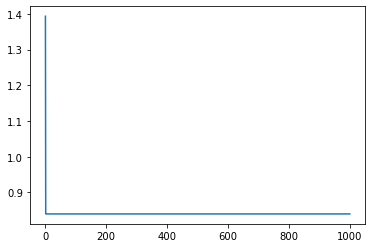

In [22]:

import matplotlib.pyplot as plt
plt.plot(range(1 , n_epochs+1) , final_losses)


In [23]:
predictions = []
with torch.no_grad():
    for i , data in enumerate(x):
        y_pred = (model(data.float()))
        predictions.append(y_pred.argmax().item())

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y , predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4520
           1       0.00      0.00      0.00       480

    accuracy                           0.90      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.82      0.90      0.86      5000



C:\Users\suhas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#Keras


In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize

In [28]:
df=pd.read_csv('C:/Users/suhas/Downloads/archive (5)/Bank_Personal_Loan_Modelling.csv')

In [29]:
df.drop(['ID'],inplace=True,axis=1)

In [30]:
df.head()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [70]:
x = df.drop(['Personal Loan'] , axis = 1)
y = df['Personal Loan']

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [72]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [73]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10 , input_shape=(12,)))
model.add(tf.keras.layers.Dense(20))
model.add(tf.keras.layers.Dense(10 , activation = 'relu'))
model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

In [74]:
with tf.device('/gpu:0'):
    model.compile(loss='mse', optimizer='Adam', metrics=['acc'])
    model.fit(x_train, y_train ,batch_size = 50 ,  epochs=500)

Epoch 1/500
75/75 [==============================] - 1s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 2/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 3/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 4/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 5/500
75/75 [==============================] - 0s 988us/step - loss: 0.0923 - acc: 0.9077
Epoch 6/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 7/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 8/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 9/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 10/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 11/500
75/75 [==============================] - 0s 

75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 173/500
75/75 [==============================] - 0s 992us/step - loss: 0.0923 - acc: 0.9077
Epoch 174/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 175/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 176/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 177/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 178/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 179/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 180/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 181/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 182/500
75/75 [==============================]

75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 343/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 344/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 345/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 346/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 347/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 348/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 349/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 350/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 351/500
75/75 [==============================] - 0s 1ms/step - loss: 0.0923 - acc: 0.9077
Epoch 352/500
75/75 [==============================] -

In [75]:
y_pred = model.predict(x_test)

40/40 [==============================] - 0s 1ms/step


In [76]:
(min(y_pred) , max(y_pred))

(array([0.], dtype=float32), array([0.], dtype=float32))

(array([   0.,    0.,    0.,    0.,    0., 1250.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

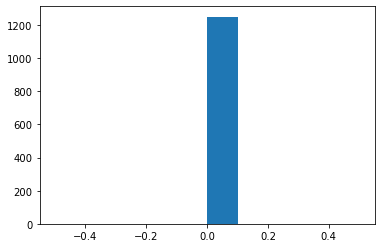

In [77]:
plt.hist(y_pred)

In [78]:
cpy = y_pred.copy()

In [79]:
y_pred = (cpy>0.334).astype(int)

In [80]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [81]:
y_test

1501    0
2586    1
2653    0
1055    0
705     0
       ..
4141    0
3168    0
2478    0
4214    0
4180    0
Name: Personal Loan, Length: 1250, dtype: int64

In [82]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1116
           1       0.00      0.00      0.00       134

    accuracy                           0.89      1250
   macro avg       0.45      0.50      0.47      1250
weighted avg       0.80      0.89      0.84      1250



C:\Users\suhas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                130       
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [3]:
import random

class Particle:
    def __init__(self, x0):
        self.position_i = []
        self.velocity_i = []
        self.pos_best_i = []
        self.err_best_i = -1
        self.err_i = -1
        
        for i in range(0, num_dimensions):
            self.velocity_i.append(random.uniform(-1, 1))
            self.position_i.append(x0[i])
    
    def evaluate(self, costFunc):
        self.err_i = costFunc(self.position_i)
        
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = self.position_i
            self.err_best_i = self.err_i
    
    def update_velocity(self, pos_best_g):
        w = 0.5
        c1 = 1
        c2 = 2
        
        for i in range(0, num_dimensions):
            r1 = random.random()
            r2 = random.random()
            
            vel_cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            vel_social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + vel_cognitive + vel_social
    
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]
            
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]
            
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]

class PSO():
    def __init__(self, costFunc, x0, bounds, num_particles, maxiter):
        global num_dimensions
        
        num_dimensions = len(x0)
        err_best_g = -1
        pos_best_g = []
        swarm = []
        
        for i in range(0, num_particles):
            swarm.append(Particle(x0))
        
        i = 0
        
        while i < maxiter:
            for j in range(0, num_particles):
                swarm[j].evaluate(costFunc)
                
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g = list(swarm[j].position_i)
                    err_best_g = float(swarm[j].err_i)
            
            for j in range(0, num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            
            i += 1
        
        print('Best position:', pos_best_g)
        print('Best error:', err_best_g)

# Example usage
def sphere(x):
    return sum([xi**2 for xi in x])

bounds = [(-4.12, 5.12)] * 2
PSO(sphere, [0.2, 0.3], bounds, num_particles=10, maxiter=30)


Best position: [8.562844752057282e-05, -3.7980334559302434e-05]
Best error: 8.774736838020036e-09
